In [233]:
import json
from decimal import Decimal, InvalidOperation

# Custom JSON decoder function to convert strings back to Decimal
def decimal_decoder(obj):
    for key, value in obj.items():
        if isinstance(value, str):  # Ensure the value is a string
            try:
                # Attempt to convert strings that look like Decimals back to Decimal objects
                obj[key] = Decimal(value)
            except InvalidOperation:
                pass  # Skip conversion if the value cannot be converted to Decimal
    return obj

# Read the list of dictionaries back from the JSON file
with open('allpick_matches_2000.json', 'r') as file:
    objs = json.load(file, object_hook=decimal_decoder)

In [236]:
objs[1]['chat']

[{'time': 1633, 'type': 'chat', 'unit': 'slipfist', 'key': 'fuN!', 'slot': 1},
 {'time': 1636,
  'type': 'chat',
  'unit': 'slipfist',
  'key': 'SO MUCH FUIN!',
  'slot': 1}]

In [1]:
def calculate_differences(int_list):
    # Ensure the list has at least 2 elements
    if len(int_list) < 2:
        raise ValueError("The list must contain at least 2 elements.")

    # Calculate the differences between consecutive elements
    differences = [int_list[i+1] - int_list[i] for i in range(len(int_list) - 1)]
    
    return differences

In [2]:
interval_sample = []
count = 0
for obj in objs:
    time = []
    if len(obj['chat']) > 1:
        for chat in obj['chat']:
            time.append(chat['time'])
        diff = calculate_differences(time)
    interval_sample += diff

NameError: name 'objs' is not defined

In [4]:
winning_sample = []
losing_sample = []
radiant = [0,1,2,3,4]
dire = [5,6,7,8,9]
count = 0

winning_L = []
losing_L = []



for obj in objs:
    winning_team_t = []
    losing_team_t = []
    wining_diff = []
    losing_diff = []
    w, l = True, True
    if len(obj['chat']) > 1:
        
        for chat in obj['chat']:
            if 'slot' in list(chat.keys()):
                if (chat['slot'] in radiant and obj['radiant_win']==True) or (chat['slot'] in dire and obj['radiant_win']==False):
                    winning_team_t.append(chat['time'])
                    # print('here')
                    if w == False:
                        winning_L.append(len(str(chat['key'])))
                    w = False
                else:
                    losing_team_t.append(chat['time'])
                    if l == False:
                        losing_L.append(len(str(chat['key'])))
                    l = False
                if len(winning_team_t)>1:
                    wining_diff = calculate_differences(winning_team_t)
                if len(losing_team_t)>1:
                    losing_diff = calculate_differences(losing_team_t)
            count+=1
    winning_sample += wining_diff
    losing_sample += losing_diff

### Original Power Law Distribution

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns



def remove_0(my_list):
    smallest = min(my_list)

    # Remove all occurrences of the smallest value
    filtered_list = [x for x in my_list if x != smallest]
    return filtered_list


def plot_ccdf(mode): # captain, allpick, allrandom, rank
    palette = sns.color_palette("Set1")
    with open('%s_matches_2000.json'%(mode), 'r') as file:
        objs = json.load(file, object_hook=decimal_decoder)
    # interval_sample = []
    # for obj in objs:
    #     time = []
    #     if len(obj['chat']) > 1:
    #         for chat in obj['chat']:
    #             time.append(chat['time'])
    #             print(chat['time'])
    #         diff = calculate_differences(time)
    #     print(time)
    #     interval_sample += diff

    winning_sample = []
    losing_sample = []
    radiant = [0,1,2,3,4]
    dire = [5,6,7,8,9]
    count = 0

    winning_L = []
    losing_L = []



    for obj in objs:
        winning_team_t = []
        losing_team_t = []
        wining_diff = []
        losing_diff = []
        w, l = True, True
        if len(obj['chat']) > 1:
            
            for chat in obj['chat']:
                if 'slot' in list(chat.keys()):
                    if (chat['slot'] in radiant and obj['radiant_win']==True) or (chat['slot'] in dire and obj['radiant_win']==False):
                        winning_team_t.append(chat['time'])
                        # print('here')
                        if w == False:
                            winning_L.append(len(str(chat['key'])))
                        w = False
                    else:
                        losing_team_t.append(chat['time'])
                        if l == False:
                            losing_L.append(len(str(chat['key'])))
                        l = False
                    if len(winning_team_t)>1:
                        wining_diff = calculate_differences(winning_team_t)
                    if len(losing_team_t)>1:
                        losing_diff = calculate_differences(losing_team_t)
                count+=1
        winning_sample += wining_diff
        losing_sample += losing_diff

    
    winning_sample=[x + 1 for x in winning_sample]
    losing_sample=[x + 1 for x in losing_sample]

    # winning_sample = remove_0(winning_sample)
    # losing_sample = remove_0(losing_sample)

    ccdf1 = []
    x1 = []
    ccdf2 = []
    x2 = []


    
    sort_sample1 = sorted(winning_sample)
    counter1 = Counter(sort_sample1)
    l1 = len(winning_sample)
    sum1 = 0

    sort_sample2 = sorted(losing_sample)
    counter2 = Counter(sort_sample2)
    l2 = len(losing_sample)
    sum2 = 0

    for key in counter1.keys():
        ccdf1.append(1-(sum1/l1))
        sum1 += counter1[key]
        x1.append(key)

    for key in counter2.keys():
        ccdf2.append(1-(sum2/l2))
        sum2 += counter2[key]
        x2.append(key)
    
    plt.figure(figsize=(10, 7))

    plt.plot(x1, ccdf1,label='Won',color=palette[0])
    plt.plot(x2, ccdf2,label='Lost',color=palette[1])

    plt.xscale('log')
    plt.yscale('log')

    plt.xlabel('Interval in sec', fontsize=18)
    plt.ylabel('CCDF', fontsize=18)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.legend(fontsize=14)
    plt.title('%s mode'%(mode), fontsize=20)

    plt.grid(True, which="both", linestyle="--", linewidth=0.5)

    plt.savefig('%s_corrected_ccdf.pdf'%(mode))
    # plt.show()

    wining_dist = Counter(winning_sample)
    losing_dist = Counter(losing_sample)

    x1=[]
    y1=[]
    for i in sorted(wining_dist): 
        x1.append(i)
        y1.append(wining_dist[i]/len(winning_sample))
    x2=[]
    y2=[]
    for i in sorted(losing_dist):
        x2.append(i)
        y2.append(losing_dist[i]/len(losing_sample))


    plt.figure(figsize=(10,7))
    

    plt.plot(x1,y1,label='Won',color=palette[0])
    plt.plot(x2,y2,label='Lost',color=palette[1])
    plt.xlabel('Interval in sec', fontsize=17)
    plt.ylabel('$P$', fontsize=17)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(['winning','losing'])
    plt.yscale('log')
    plt.xscale('log')
    plt.title('%s Mode Matches' %(mode), fontsize=19)

    # all_pick={'x1':x1,'y1':y1,'x2':x2,'y2':y2}
    plt.savefig('%s_corrected_pdf.pdf'%(mode))
    plt.show()

    return winning_sample, losing_sample

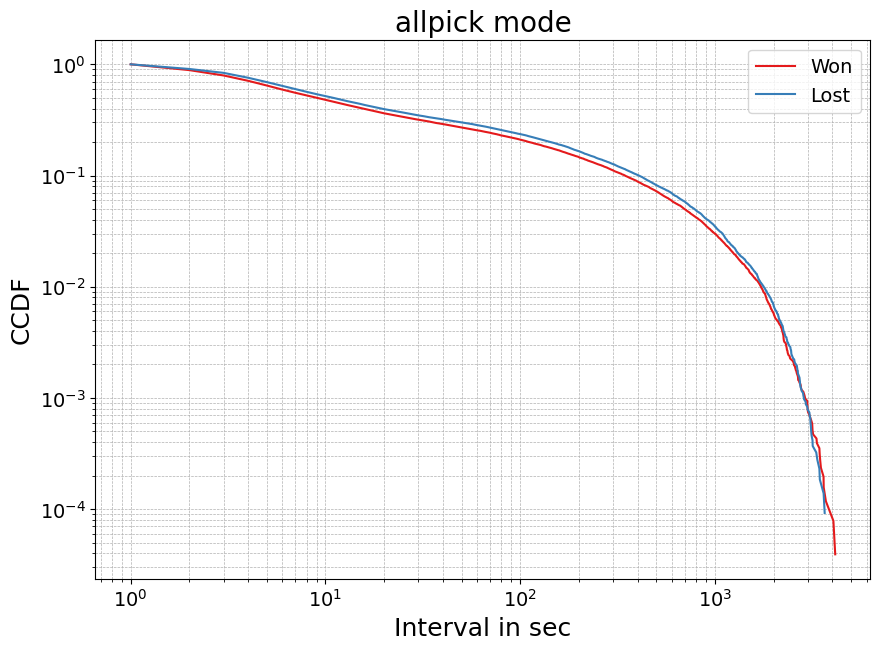

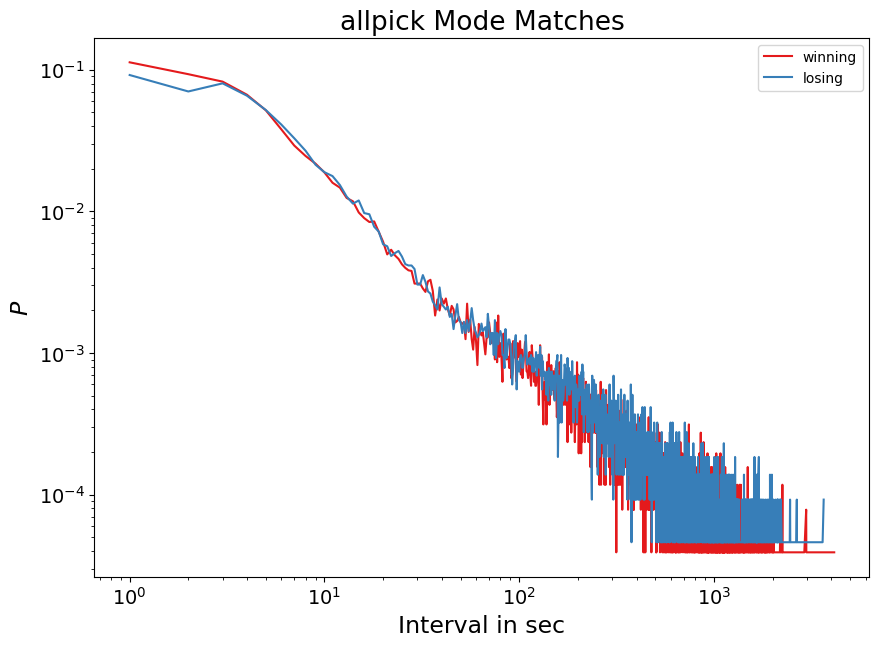

In [238]:
mode = 'allpick'
w,l=plot_ccdf(mode)

In [146]:
import powerlaw

fit = powerlaw.Fit(w)


Calculating best minimal value for power law fit


In [147]:
R, p_value = fit.distribution_compare('power_law', 'lognormal')


In [213]:
p_value

2.5719657950114317e-19

In [239]:
print(f"Alpha (scaling parameter): {fit.power_law.alpha}")
print(f"Xmin (cutoff for power-law fit): {fit.power_law.xmin}")

# Test the goodness-of-fit
R, p_value = fit.distribution_compare('power_law', 'lognormal')

# Display results
if p_value > 0.05:
    print(f"Data plausibly fits a power-law distribution (p = {p_value:.4f}).")
else:
    print(f"Data does not follow a power-law distribution (p = {p_value:.4f}).")

Alpha (scaling parameter): 1.333067800649904
Xmin (cutoff for power-law fit): 1.0
Data does not follow a power-law distribution (p = 0.0000).


In [240]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

loc_exp, scale_exp = stats.expon.fit(w)
lambda_exp = 1 / scale_exp
print(f"Exponential Fit: lambda = {1/scale_exp:.4f}")

# 2. Fit Weibull Stretch Distribution
shape_w, loc_w, scale_w = stats.weibull_min.fit(w)
print(f"Weibull Fit: shape (k) = {shape_w:.4f}, scale = {scale_w:.4f}")

# 3. Fit Cut-Off Power-Law Distribution
fit = powerlaw.Fit(w, xmin=min(w), distribution='truncated_power_law')
alpha_cutoff = fit.truncated_power_law.alpha
lambda_cutoff = fit.truncated_power_law.parameter1
print(f"Cut-off Power-Law Fit: alpha = {alpha_cutoff:.4f}, lambda = {lambda_cutoff:.4f}")


ks_exp, p_exp = stats.kstest(w, 'expon', args=(loc_exp, scale_exp))
ks_weibull, p_weibull = stats.kstest(w, 'weibull_min', args=(shape_w, loc_w, scale_w))

print(f"Exponential KS: statistic = {ks_exp:.4f}, p-value = {p_exp:.4f}")
print(f"Weibull KS: statistic = {ks_weibull:.4f}, p-value = {p_weibull:.4f}")

Exponential Fit: lambda = 0.0083
Weibull Fit: shape (k) = 0.3312, scale = 172.7268
Cut-off Power-Law Fit: alpha = 1.2101, lambda = 1.2101
Exponential KS: statistic = 0.4982, p-value = 0.0000
Weibull KS: statistic = 0.2620, p-value = 0.0000


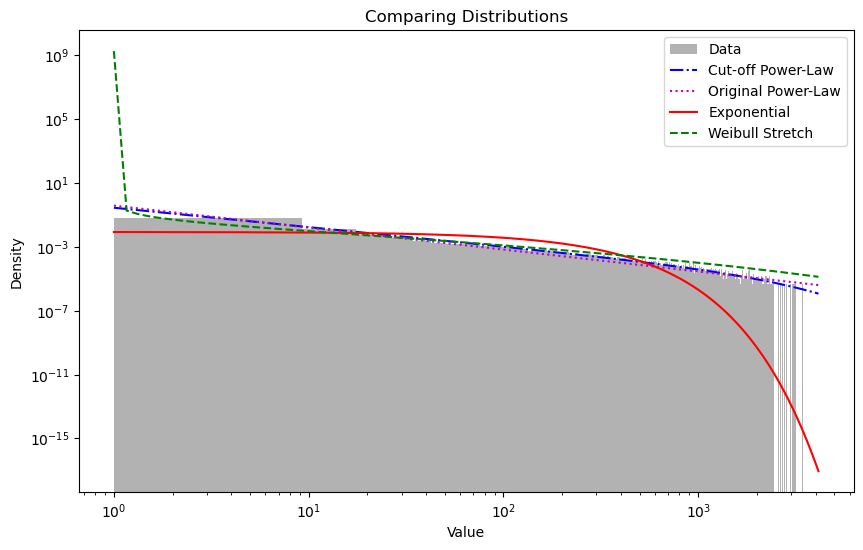

In [241]:
# Generate x values within the range of the data
x = np.linspace(min(w), max(w), len(w))  # Match length of `data`

# Generate PDFs for each distribution
pdf_cutoff = fit.truncated_power_law.pdf(x)
pdf_powerlaw = fit.power_law.pdf(x)  # Original power-law
pdf_exp = stats.expon.pdf(x, loc_exp, scale_exp)
pdf_weibull = stats.weibull_min.pdf(x, shape_w, loc_w, scale_w)

# Plot the distributions and histogram
plt.figure(figsize=(10, 6))

# Histogram of data
plt.hist(w, bins=500, density=True, alpha=0.6, label='Data', color='gray')

# Fit lines
plt.plot(x[:len(pdf_cutoff)], pdf_cutoff, 'b-.', label='Cut-off Power-Law')
plt.plot(x[:len(pdf_powerlaw)], pdf_powerlaw, 'm:', label='Original Power-Law')
plt.plot(x, pdf_exp, 'r-', label='Exponential')
plt.plot(x, pdf_weibull, 'g--', label='Weibull Stretch')

# Log scales
plt.xscale('log')
plt.yscale('log')

# Labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Comparing Distributions')
plt.show()

In [242]:
fit = powerlaw.Fit(w, xmin=min(w), distribution='truncated_power_law')

# Compare truncated power-law with exponential
R_exp, p_exp = fit.distribution_compare('truncated_power_law', 'exponential')

# Compare truncated power-law with Weibull Stretch (stretched exponential)
R_weibull, p_weibull = fit.distribution_compare('truncated_power_law', 'stretched_exponential')

# Results
print(f"Truncated vs Exponential: R = {R_exp:.4f}, p-value = {p_exp:.4f}")
print(f"Truncated vs Weibull Stretch: R = {R_weibull:.4f}, p-value = {p_weibull:.4f}")

Truncated vs Exponential: R = 31028.3883, p-value = 0.0000
Truncated vs Weibull Stretch: R = 495.1186, p-value = 0.0000


In [243]:
import powerlaw
import numpy as np

# Example dataset (replace with your data)

# Fit data to the distributions
fit = powerlaw.Fit(w, xmin=min(w))  # Automatically fits pure power-law and alternatives

# Compare pure power-law with other models
R_powerlaw_cutoff, p_powerlaw_cutoff = fit.distribution_compare('power_law', 'truncated_power_law')
R_powerlaw_exp, p_powerlaw_exp = fit.distribution_compare('power_law', 'exponential')
R_powerlaw_weibull, p_powerlaw_weibull = fit.distribution_compare('power_law', 'stretched_exponential')

# Compare truncated power-law with other models
R_cutoff_exp, p_cutoff_exp = fit.distribution_compare('truncated_power_law', 'exponential')
R_cutoff_weibull, p_cutoff_weibull = fit.distribution_compare('truncated_power_law', 'stretched_exponential')

# Results
print("Comparison Results:")
print(f"Power-law vs Cut-off Power-law: R = {R_powerlaw_cutoff:.4f}, p-value = {p_powerlaw_cutoff:.4f}")
print(f"Power-law vs Exponential: R = {R_powerlaw_exp:.4f}, p-value = {p_powerlaw_exp:.4f}")
print(f"Power-law vs Weibull Stretch: R = {R_powerlaw_weibull:.4f}, p-value = {p_powerlaw_weibull:.4f}")
print(f"Cut-off Power-law vs Exponential: R = {R_cutoff_exp:.4f}, p-value = {p_cutoff_exp:.4f}")
print(f"Cut-off Power-law vs Weibull Stretch: R = {R_cutoff_weibull:.4f}, p-value = {p_cutoff_weibull:.4f}")

Assuming nested distributions


Comparison Results:
Power-law vs Cut-off Power-law: R = -1827.1065, p-value = 0.0000
Power-law vs Exponential: R = 29201.2818, p-value = 0.0000
Power-law vs Weibull Stretch: R = -1331.9879, p-value = 0.0000
Cut-off Power-law vs Exponential: R = 31028.3883, p-value = 0.0000
Cut-off Power-law vs Weibull Stretch: R = 495.1186, p-value = 0.0000


In [244]:
# Fit data to the distributions
fit = powerlaw.Fit(l, xmin=min(l))  # Automatically fits pure power-law and alternatives

# Compare pure power-law with other models
R_powerlaw_cutoff, p_powerlaw_cutoff = fit.distribution_compare('power_law', 'truncated_power_law')
R_powerlaw_exp, p_powerlaw_exp = fit.distribution_compare('power_law', 'exponential')
R_powerlaw_weibull, p_powerlaw_weibull = fit.distribution_compare('power_law', 'stretched_exponential')

# Compare truncated power-law with other models
R_cutoff_exp, p_cutoff_exp = fit.distribution_compare('truncated_power_law', 'exponential')
R_cutoff_weibull, p_cutoff_weibull = fit.distribution_compare('truncated_power_law', 'stretched_exponential')

# Results
print("Comparison Results:")
print(f"Power-law vs Cut-off Power-law: R = {R_powerlaw_cutoff:.4f}, p-value = {p_powerlaw_cutoff:.4f}")
print(f"Power-law vs Exponential: R = {R_powerlaw_exp:.4f}, p-value = {p_powerlaw_exp:.4f}")
print(f"Power-law vs Weibull Stretch: R = {R_powerlaw_weibull:.4f}, p-value = {p_powerlaw_weibull:.4f}")
print(f"Cut-off Power-law vs Exponential: R = {R_cutoff_exp:.4f}, p-value = {p_cutoff_exp:.4f}")
print(f"Cut-off Power-law vs Weibull Stretch: R = {R_cutoff_weibull:.4f}, p-value = {p_cutoff_weibull:.4f}")

Assuming nested distributions


Comparison Results:
Power-law vs Cut-off Power-law: R = -2111.1796, p-value = 0.0000
Power-law vs Exponential: R = 21703.9631, p-value = 0.0000
Power-law vs Weibull Stretch: R = -1726.4611, p-value = 0.0000
Cut-off Power-law vs Exponential: R = 23815.1427, p-value = 0.0000
Cut-off Power-law vs Weibull Stretch: R = 384.7185, p-value = 0.0000


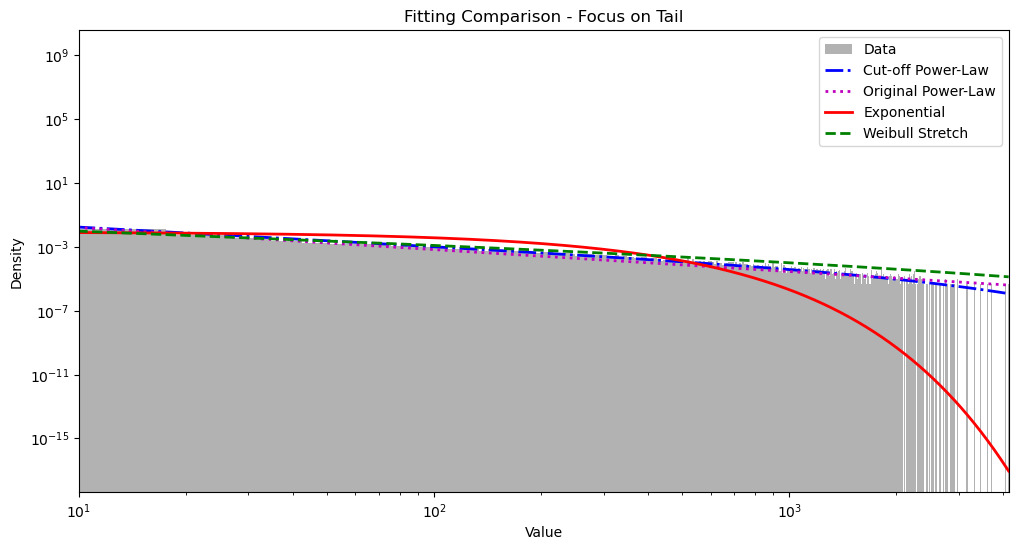

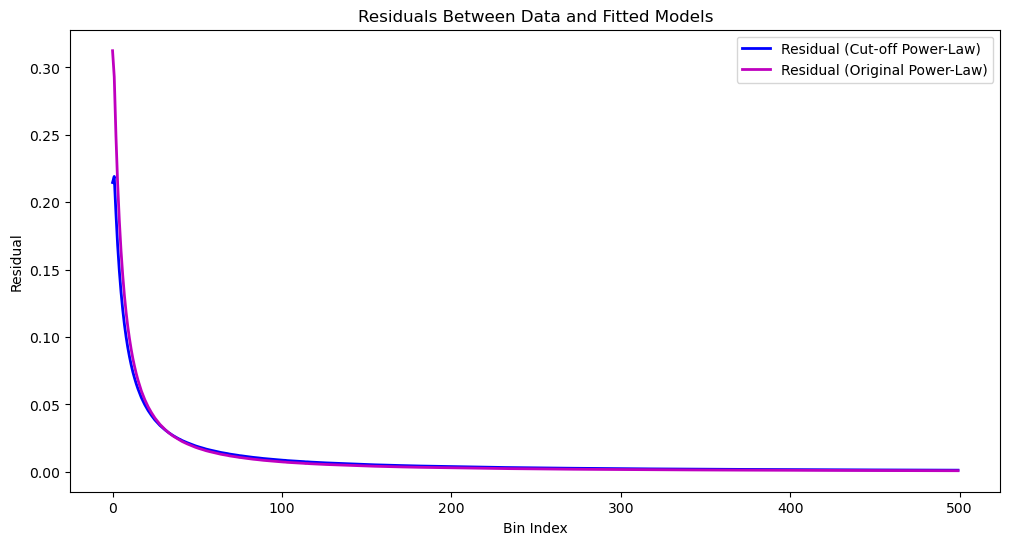

In [245]:
# Plot the main comparison, focusing on the tail region
plt.figure(figsize=(12, 6))

# Plot the histogram of data
plt.hist(w, bins=500, density=True, alpha=0.6, label='Data', color='gray')

# Plot fitted distributions
plt.plot(x[:len(pdf_cutoff)], pdf_cutoff, 'b-.', linewidth=2, label='Cut-off Power-Law')
plt.plot(x[:len(pdf_powerlaw)], pdf_powerlaw, 'm:', linewidth=2, label='Original Power-Law')
plt.plot(x, pdf_exp, 'r-', linewidth=2, label='Exponential')
plt.plot(x, pdf_weibull, 'g--', linewidth=2, label='Weibull Stretch')

# Focus on tail values
plt.xscale('log')
plt.yscale('log')
plt.xlim(10, max(w))  # Focus on tail region

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Fitting Comparison - Focus on Tail')
plt.show()

# Plot residuals
plt.figure(figsize=(12, 6))

# Compute residuals (absolute difference between data and fitted PDFs)
residual_cutoff = np.abs(np.histogram(w, bins=500, density=True)[0] - pdf_cutoff[:500])
residual_powerlaw = np.abs(np.histogram(w, bins=500, density=True)[0] - pdf_powerlaw[:500])

# Plot residuals
plt.plot(residual_cutoff, 'b-', linewidth=2, label='Residual (Cut-off Power-Law)')
plt.plot(residual_powerlaw, 'm-', linewidth=2, label='Residual (Original Power-Law)')
plt.xlabel('Bin Index')
plt.ylabel('Residual')
plt.legend()
plt.title('Residuals Between Data and Fitted Models')
plt.show()

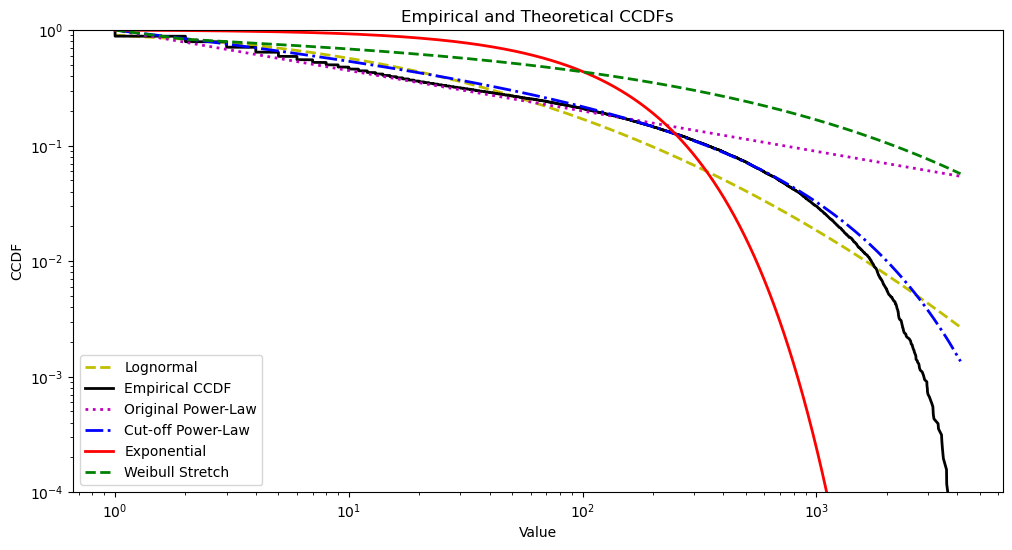

In [246]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate the empirical CCDF
sorted_data = np.sort(w)  # Sort data
ccdf_empirical = 1.0 - np.arange(1, len(sorted_data) + 1) / len(sorted_data)  # CCDF formula

# Step 2: Calculate the theoretical CCDFs
ccdf_powerlaw = fit.power_law.ccdf(sorted_data)  # Original power-law CCDF
ccdf_cutoff = fit.truncated_power_law.ccdf(sorted_data)  # Cut-off power-law CCDF

# Step 3: Plot the empirical and theoretical CCDFs
plt.figure(figsize=(12, 6))

# Empirical CCDF

shape, loc, scale = stats.lognorm.fit(w, floc=0)  # floc=0 constrains location
pdf_lognormal = stats.lognorm.pdf(sorted_data, shape, loc, scale)
ccdf_lognormal = 1 - stats.lognorm.cdf(sorted_data, shape, loc, scale)

# Plot
plt.plot(sorted_data, ccdf_lognormal, 'y--', label='Lognormal', linewidth=2)
plt.plot(sorted_data, ccdf_empirical, 'k-', label='Empirical CCDF', linewidth=2)

# Original Power-Law CCDF
plt.plot(sorted_data, ccdf_powerlaw, 'm:', label='Original Power-Law', linewidth=2)

# Cut-off Power-Law CCDF
plt.plot(sorted_data, ccdf_cutoff, 'b-.', label='Cut-off Power-Law', linewidth=2)

# Calculate CCDFs for Exponential and Weibull
ccdf_exponential = 1 - stats.expon.cdf(sorted_data, loc_exp, scale_exp)
ccdf_weibull = 1 - stats.weibull_min.cdf(sorted_data, shape_w, loc_w, scale_w)

plt.plot(sorted_data, ccdf_exponential, 'r-', label='Exponential', linewidth=2)
plt.plot(sorted_data, ccdf_weibull, 'g--', label='Weibull Stretch', linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('CCDF')
plt.ylim(1e-4,1)
plt.legend()
plt.title('Empirical and Theoretical CCDFs')
plt.savefig('%s_won_compare.pdf'%(mode))
plt.show()

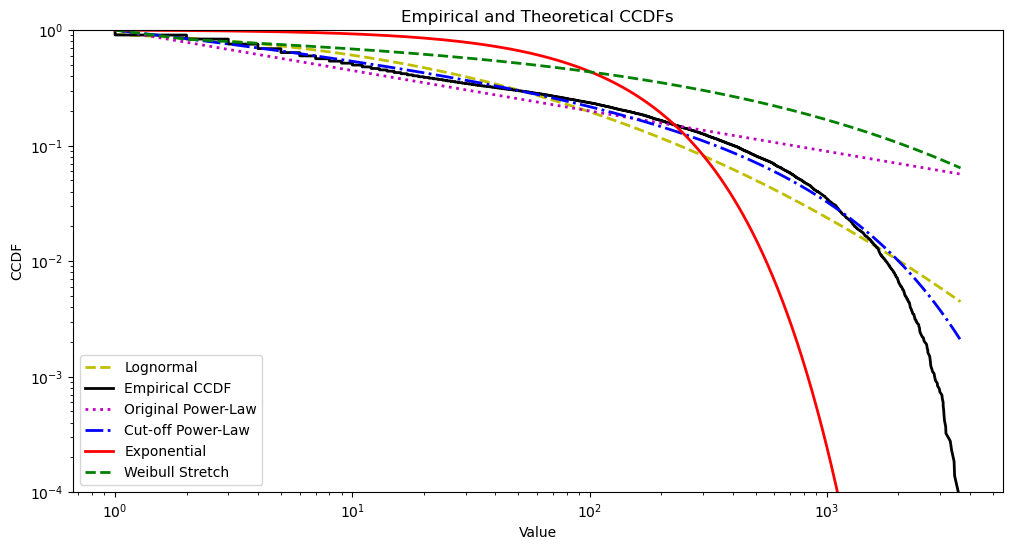

In [247]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Calculate the empirical CCDF
sorted_data = np.sort(l)  # Sort data
ccdf_empirical = 1.0 - np.arange(1, len(sorted_data) + 1) / len(sorted_data)  # CCDF formula

# Step 2: Calculate the theoretical CCDFs
ccdf_powerlaw = fit.power_law.ccdf(sorted_data)  # Original power-law CCDF
ccdf_cutoff = fit.truncated_power_law.ccdf(sorted_data)  # Cut-off power-law CCDF

# Step 3: Plot the empirical and theoretical CCDFs
plt.figure(figsize=(12, 6))

# Empirical CCDF

shape, loc, scale = stats.lognorm.fit(l, floc=0)  # floc=0 constrains location
pdf_lognormal = stats.lognorm.pdf(sorted_data, shape, loc, scale)
ccdf_lognormal = 1 - stats.lognorm.cdf(sorted_data, shape, loc, scale)

# Plot
plt.plot(sorted_data, ccdf_lognormal, 'y--', label='Lognormal', linewidth=2)
plt.plot(sorted_data, ccdf_empirical, 'k-', label='Empirical CCDF', linewidth=2)

# Original Power-Law CCDF
plt.plot(sorted_data, ccdf_powerlaw, 'm:', label='Original Power-Law', linewidth=2)

# Cut-off Power-Law CCDF
plt.plot(sorted_data, ccdf_cutoff, 'b-.', label='Cut-off Power-Law', linewidth=2)

# Calculate CCDFs for Exponential and Weibull
ccdf_exponential = 1 - stats.expon.cdf(sorted_data, loc_exp, scale_exp)
ccdf_weibull = 1 - stats.weibull_min.cdf(sorted_data, shape_w, loc_w, scale_w)

plt.plot(sorted_data, ccdf_exponential, 'r-', label='Exponential', linewidth=2)
plt.plot(sorted_data, ccdf_weibull, 'g--', label='Weibull Stretch', linewidth=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('CCDF')
plt.ylim(1e-4,1)
plt.legend()
plt.title('Empirical and Theoretical CCDFs')
plt.savefig('%s_lost_compare.pdf'%(mode))
plt.show()